In [78]:
from qiskit import QuantumCircuit, Aer
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [79]:
# provider = IBMProvider()

# Load Pickle

In [80]:
# qcs: list[QuantumCircuit]
# max_cnots, random_circs_per_cnot_value, q1, q2, snoopers, qcs = pickle.load(open( 'snooping_qcs_with_gap_7_qubits_IBMQ.pickle', "rb"))

# Run on IBMQ

In [81]:
job_id: str = None
backend_name: str = None

In [82]:
job_id = 'cgb9ervs21rmqo8sbth0'
# backend_name = 'ibm_nairobi'

In [83]:
if job_id == None:
    backend = provider.get_backend(backend_name)
    pm = generate_preset_pass_manager(0, backend)
    print('Transpiling circuits...')
    tqcs = pm.run(qcs)
    job = backend.run(tqcs, shots=8000)
    # job.update_tags(['snooping', 'two_way_cnot', 'gap'])
    print('New job: ', job.job_id())
else:
    job = provider.backend.retrieve_job(job_id)
    print('Retrieved job:', job.job_id())

Retrieved job: cgb9ervs21rmqo8sbth0


# Analyse Results

In [84]:
tqcs = job.circuits()
qc_res_counts = job.result().get_counts()

In [85]:
import os
path = 'snooping_results/{}/{}'.format(job.backend().name, job.job_id())
if not os.path.exists(path):
   os.makedirs(path)

In [86]:
for cnot_count in range(max_cnots):
    start_index = cnot_count*random_circs_per_cnot_value
    data = qc_res_counts[start_index: start_index+random_circs_per_cnot_value]
    title='CNOTs-{}'.format(cnot_count)
    fig = plot_histogram(data, title=title)
    fig.savefig('{}/{}.png'.format(path, title))


In [87]:
for cnot_count in range(max_cnots):
    start_index = cnot_count*random_circs_per_cnot_value
    depths = []
    for i in range(start_index, start_index+random_circs_per_cnot_value):
        depths.append(tqcs[i].depth())
    print(cnot_count, stats.describe(depths))

0 DescribeResult(nobs=60, minmax=(8, 10), mean=9.383333333333333, variance=0.3759887005649717, skewness=-0.4367085290018458, kurtosis=-0.6616571486954168)
1 DescribeResult(nobs=60, minmax=(9, 30), mean=14.016666666666667, variance=14.898022598870055, skewness=1.6904088338533307, kurtosis=3.648700631015302)
2 DescribeResult(nobs=60, minmax=(11, 35), mean=17.4, variance=29.498305084745766, skewness=1.592767965962449, kurtosis=2.9071171448657678)
3 DescribeResult(nobs=60, minmax=(12, 42), mean=20.866666666666667, variance=34.69378531073446, skewness=1.2280961751306259, kurtosis=1.5872852140127458)
4 DescribeResult(nobs=60, minmax=(14, 47), mean=25.033333333333335, variance=50.880225988700566, skewness=0.9828617635536363, kurtosis=0.7946764839772316)
5 DescribeResult(nobs=60, minmax=(18, 56), mean=29.883333333333333, variance=73.02005649717515, skewness=1.0348117722165207, kurtosis=0.5968442035659502)
6 DescribeResult(nobs=60, minmax=(19, 56), mean=33.4, variance=68.14237288135594, skewnes

In [88]:
for cnot_count in range(cnot_count):
    start_index = cnot_count*random_circs_per_cnot_value
    data = []
    for i in range(start_index, start_index+random_circs_per_cnot_value):
        data.append(qc_res_counts[i]['000'])
    print(cnot_count, stats.describe(data))


0 DescribeResult(nobs=60, minmax=(7715, 7801), mean=7753.833333333333, variance=259.1242937853107, skewness=0.31507872402744463, kurtosis=0.5398543203277577)
1 DescribeResult(nobs=60, minmax=(6897, 7643), mean=7464.283333333334, variance=17385.935310734465, skewness=-1.806411029023263, kurtosis=4.473626413892927)
2 DescribeResult(nobs=60, minmax=(6075, 7323), mean=6987.366666666667, variance=67603.38870056497, skewness=-1.7162302312679534, kurtosis=3.500204999220429)
3 DescribeResult(nobs=60, minmax=(4741, 6855), mean=6334.466666666666, variance=148044.08361581917, skewness=-1.5852749057215172, kurtosis=3.4892445888782717)
4 DescribeResult(nobs=60, minmax=(4306, 6375), mean=5571.766666666666, variance=212847.809039548, skewness=-0.9628886571589739, kurtosis=1.0189741223023514)
5 DescribeResult(nobs=60, minmax=(3229, 5404), mean=4636.033333333334, variance=286323.7276836158, skewness=-0.7380348924592606, kurtosis=-0.11064159030310661)
6 DescribeResult(nobs=60, minmax=(2643, 4821), mean=

In [89]:
dataa = []
for cnot_count in range(max_cnots):
    start_index = cnot_count*random_circs_per_cnot_value
    data = []
    for i in range(start_index, start_index+random_circs_per_cnot_value):
        data.append(qc_res_counts[i]['000'])
    dataa.append(data)

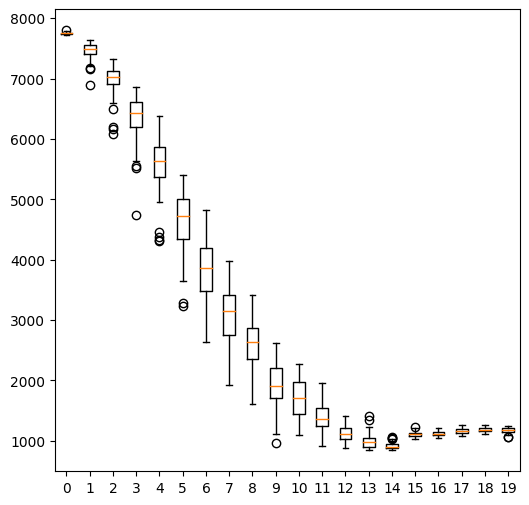

In [90]:
fig, axs = plt.subplots(figsize=(6, 6))
axs.boxplot(dataa, labels=range(max_cnots))
plt.show(fig)
title = '000 distribution'
fig.savefig('{}/{}.png'.format(path, title))


# Predicting CNOTs using regression

## Linear Regression

In [91]:
# qc_shots = 8000

In [92]:
# label = []
# data = []
# for cnot_count in range(max_cnots):
#     start_index = cnot_count*random_circs_per_cnot_value
#     for i in range(start_index, start_index+random_circs_per_cnot_value):
#         d = []
#         res = qc_res_counts[i]
#         # for i in range(2**3):
#         #     d.append(res.get('{0:03b}'.format(i), 0)/qc_shots)
#         d.append(res.get('000', 0))
#         label.append(cnot_count)
#         data.append(d)

In [93]:
# label = np.array(label) 
# data = np.array(data)

In [94]:
# from sklearn.linear_model import LogisticRegression

# reg = LogisticRegression(random_state=0)
# reg.fit(data, label)
# reg.score(data, label)

In [95]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=1)
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
# clf.fit(data, label)